In this notebook, we take a look at response-time-related variables, such as mouse- and eye-response initation times, and difference between those, termed initial decision (ID) lag.

# Table of Contents
1. [Preparing the data and plots](#preparing)
2. [Mouse initiation time](#mouse_IT)
    * [CoM differences](#mouse_IT_CoM)
3. [Eye initiation time](#eye_IT)
    * [CoM differences](#eye_IT_CoM)
4. [Hand-eye lag at initial decision](#ID_lag)

<a name="preparing"></a>
# Preparing data and plots
First, we set up visuals and read the data.

In [115]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

#set precision for displaying float-point values in the notebook
pd.options.display.float_format = '{:,.3f}'.format

#set figure dpi to 100 to get reasonably sized figures displayed in the notebook
plt.rc('figure', dpi=100)

#set savefig dpi to 300 to get high-quality images to insert in the paper
plt.rc('savefig', dpi=300)

#set to 'pdf' or 'eps' for vector figures or to 'png'
plt.rc('savefig', format='png')

#set font sizes for figures throughout
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=20, titlesize=22)
plt.rc('legend', fontsize=18)

palette = sns.color_palette()
scale = 1.0

In [75]:
import data_reader
dr = data_reader.DataReader()

# if Exp1 and Exp2 data need to be plotted alongside each other, read those data into separate dataframes
exp_1, exp_2 = 'exp_1', 'exp_2'
choices_1, dynamics_1, stim_viewing_1 = dr.get_data(path='../../data/HEM_%s/processed/' % (exp_1), stim_viewing=True)
choices_2, dynamics_2, stim_viewing_2 = dr.get_data(path='../../data/HEM_%s/processed/' % (exp_2), stim_viewing=True)

choices_1['ID_lag'] = choices_1.mouse_IT - choices_1.eye_IT
choices_2['ID_lag'] = choices_2.mouse_IT - choices_2.eye_IT

We have to drop infinite eye initation times (this happens when eye does not move from the center of the screen throughout the trial)

In [76]:
def discard_inf_eye_IT_trials(choices):
    to_discard = (abs(choices['eye_IT']) == np.inf)
    choices = choices[~to_discard]
    print('%i trials discarded due to no movements' % (to_discard.sum()))
    return choices

choices_1 = discard_inf_eye_IT_trials(choices_1)
choices_2 = discard_inf_eye_IT_trials(choices_2)

7 trials discarded due to no movements
155 trials discarded due to no movements


Next we have a function which will plot individual- and group-level mean values of response-time-related variables for each coherence level.

In [77]:
import matplotlib.lines as mlines

def plot_var_vs_coherence(choices, exp, var):    
    choices['subj_id'] = choices.index.get_level_values('subj_id')
    subj_order = sorted(choices.subj_id.unique())
    
    plt.figure()
    
    ax = sns.pointplot(data=choices[(choices.is_correct) & (choices.coherence>0)], 
                       x='coherence', y=var, hue='subj_id', 
                       palette=palette, scale=scale, errwidth=0.5, 
                       join=False, dodge=True, capsize=.2, hue_order=subj_order)
    
    ax = sns.pointplot(data=choices[(~choices.is_correct) & (choices.coherence>0)], 
                       x='coherence', y=var, hue='subj_id', 
                       palette=palette, linestyles=['--', '--', '--', '--'], 
                       markers=['x', 'x', 'x', 'x'], scale=scale, 
                       errwidth=0.5, dodge=True, capsize=.2, join=False, 
                       hue_order=subj_order, ax=ax)

    ax = sns.pointplot(data=choices[(choices.coherence>0) & (choices.is_correct)],
                       x='coherence', y=var, linestyles=['-'], color='grey', 
                       scale=scale, errwidth=0.5, ax=ax)

    ax = sns.pointplot(data=choices[(choices.coherence>0) & (~choices.is_correct)], 
                       x='coherence', y=var, linestyles=['--'], color='grey',
                       markers=['x'], scale=scale, errwidth=0.5, ax=ax)
#     ax.set_ylim([0, 1.2])      
    ax.set_xlabel('Coherence')
    ax.set_ylabel(var)
    
    ax.legend_.remove()
    correct_line = mlines.Line2D([], [], color='grey', marker='o', lw=3.0, label='Correct trials')
    error_line = mlines.Line2D([], [], color='grey', marker='x', ls='--', lw=3.0, label='Error trials')
    plt.legend(handles=[correct_line, error_line])
    plt.title(exp)
    plt.tight_layout()
    plt.savefig('figures/%s_vs_coherence_ind_%s' % (var, exp))

<a name="mouse_IT"></a>
# Mouse initation time

OK, let's look at mouse initation times for each coherence level

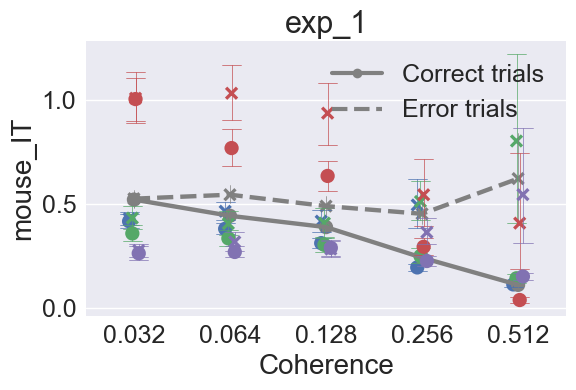

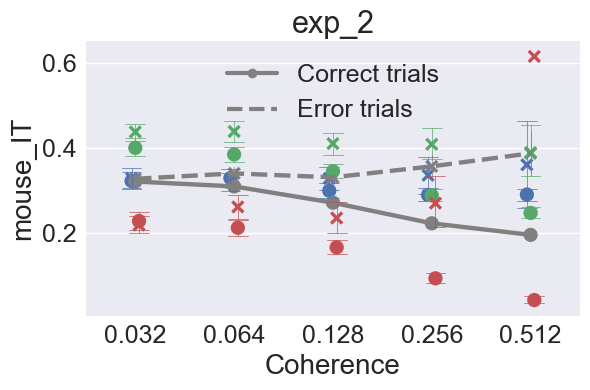

In [78]:
plot_var_vs_coherence(choices_1, exp_1, var='mouse_IT')
plot_var_vs_coherence(choices_2, exp_2, var='mouse_IT')

Pretty much what we expect: for all subjects (except the red subject in Exp 1), mouse IT decreases with coherence for correct trials, and remains more-less constant or even increases for error trials __('<' pattern)__. Notably, the '<' pattern is way less pronounced in blue participant in Exp 2.

<a name="mouse_IT_CoM"></a>
## CoM differences

In [97]:
choices_1['mouse_IT_norm'] = choices_1.mouse_IT.groupby(level='subj_id').apply(lambda c: c/c.mean())
choices_2['mouse_IT_norm'] = choices_2.mouse_IT.groupby(level='subj_id').apply(lambda c: c/c.mean())

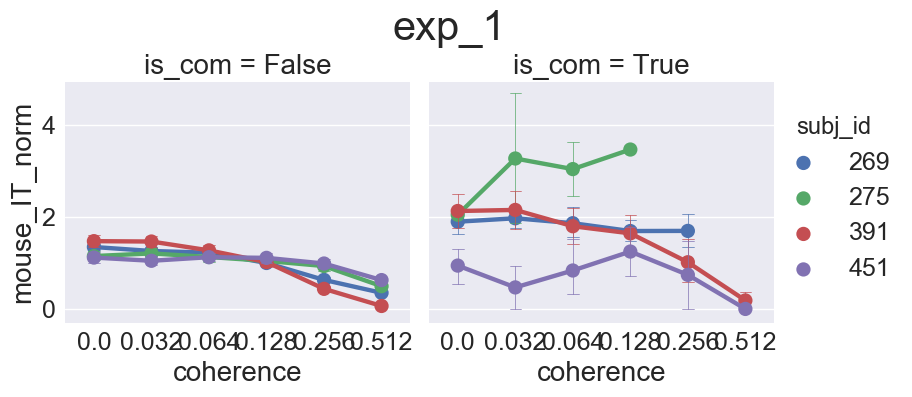

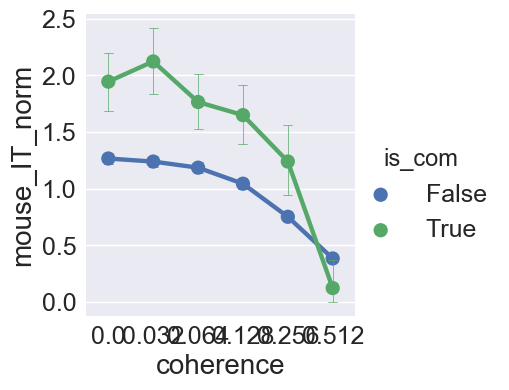

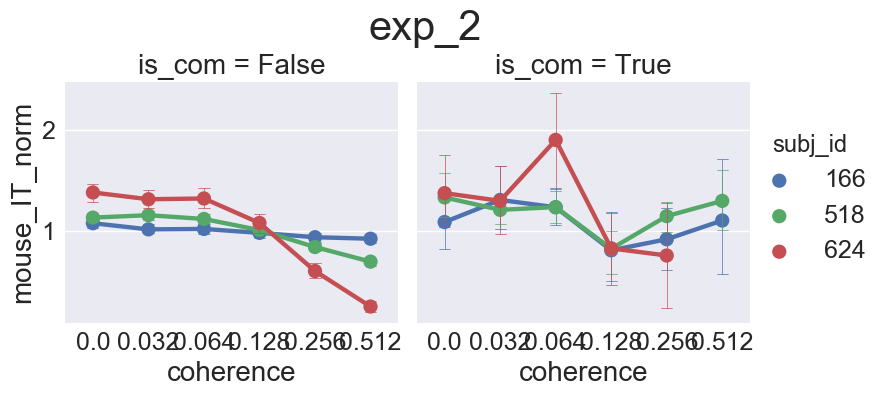

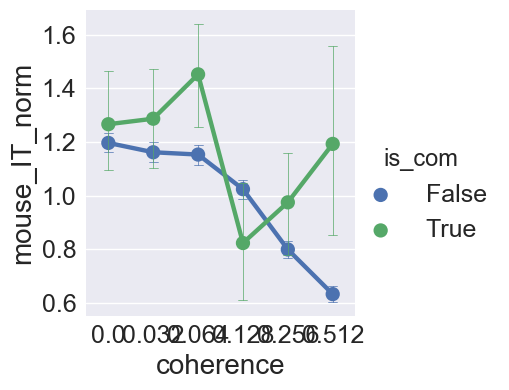

In [111]:
def plot_mouse_IT_norm(choices, exp):
    ax = sns.factorplot(data=choices, x='coherence', y='mouse_IT_norm', 
                        col='is_com', hue='subj_id', capsize=.2, errwidth=0.5)
    plt.subplots_adjust(top=0.8);
    plt.suptitle(exp, fontsize=30);
    plt.figure();
    sns.factorplot(data=choices, x='coherence', y='mouse_IT_norm', hue='is_com', capsize=.2, errwidth=0.5);
    
    
plot_mouse_IT_norm(choices_1, exp_1)
plot_mouse_IT_norm(choices_2, exp_2)

<a name="eye_IT"></a>
# Eye initation time

Next, we look at eye latencies (termed eye initiation time for consistency)

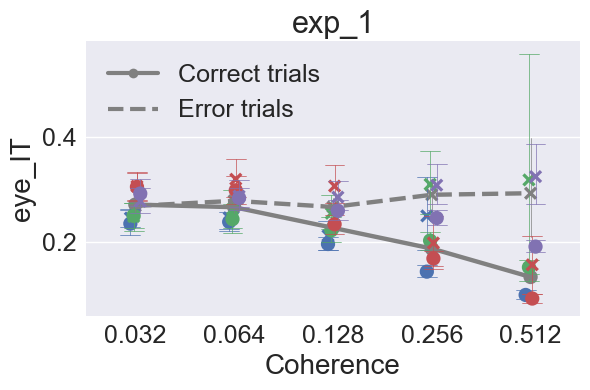

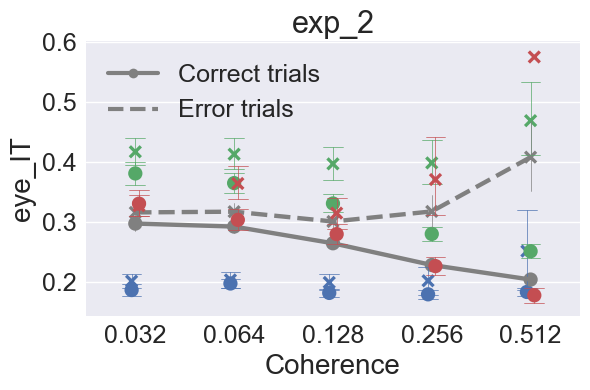

In [79]:
plot_var_vs_coherence(choices_1, exp_1, var='eye_IT')
plot_var_vs_coherence(choices_2, exp_2, var='eye_IT')

The overall pattern is very similar to mouse IT. In Exp 1, there are basically no individual differences. However, in Exp 2, the blue participant had almost constant eye IT for all coherence level and correct/error trials. (the same participant had almost constant mouse IT in the plot above).

<a name="eye_IT_CoM"></a>
## CoM differences

In [113]:
choices_1['eye_IT_norm'] = choices_1.eye_IT.groupby(level='subj_id').apply(lambda c: c/c.mean())
choices_2['eye_IT_norm'] = choices_2.eye_IT.groupby(level='subj_id').apply(lambda c: c/c.mean())

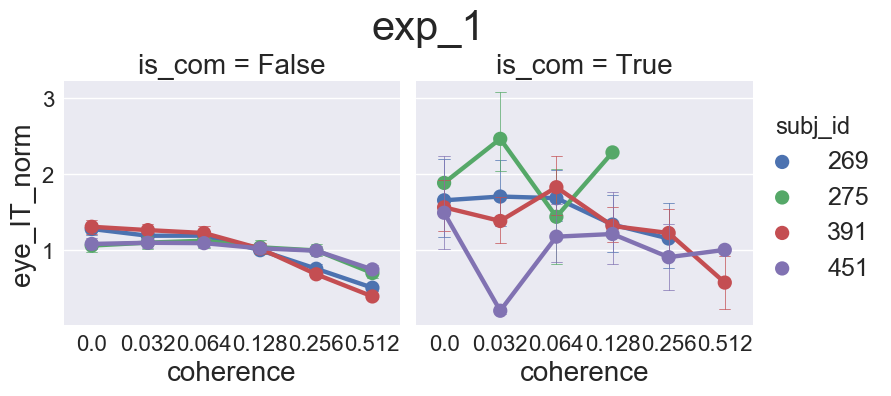

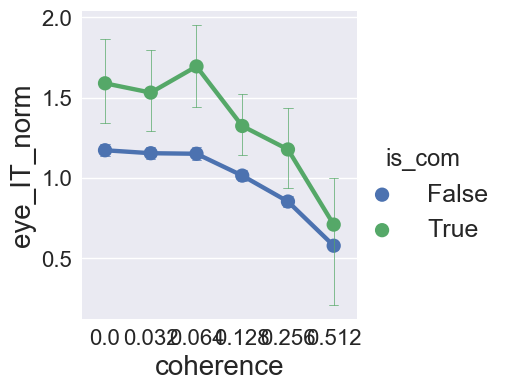

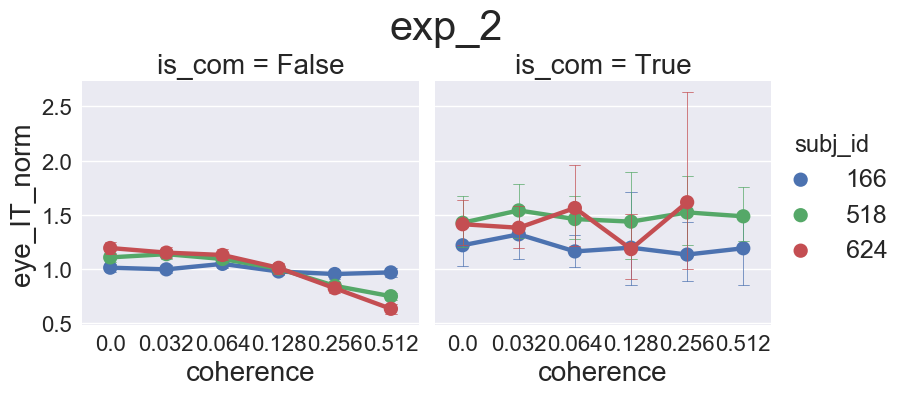

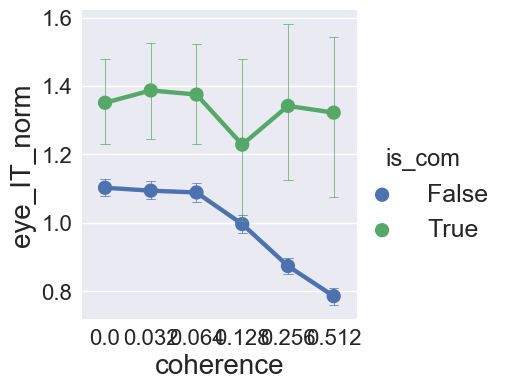

In [116]:
def plot_eye_IT_norm(choices, exp):
    ax = sns.factorplot(data=choices, x='coherence', y='eye_IT_norm', 
                        col='is_com', hue='subj_id', capsize=.2, errwidth=0.5)
    plt.subplots_adjust(top=0.8);
    plt.suptitle(exp, fontsize=30);
    plt.figure();
    sns.factorplot(data=choices, x='coherence', y='eye_IT_norm', hue='is_com', capsize=.2, errwidth=0.5);
    
    
plot_eye_IT_norm(choices_1, exp_1)
plot_eye_IT_norm(choices_2, exp_2)

<a name="ID_lag"></a>
# Hand-eye lag at initial decision
Now, let's look at the hand-eye lag at initial decision:
>ID_lag = mouse_IT - eye_IT

Interestingly, ID lag is highly correlated with mouse IT in Exp 1
(correlation is much weaker in Exp 2, around 0.6)

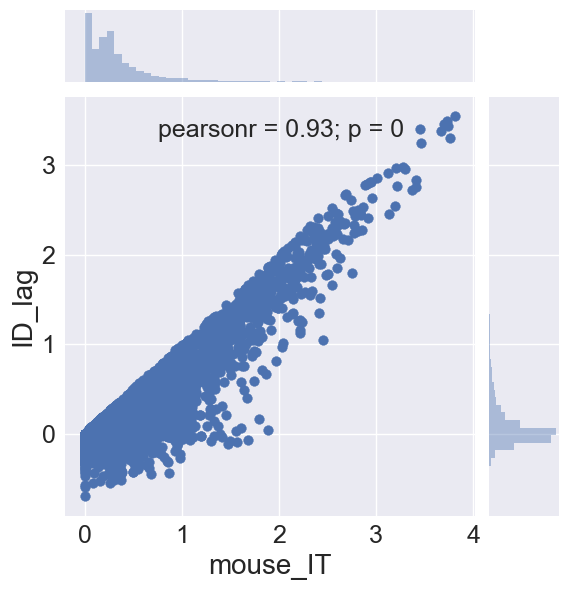

In [83]:
sns.jointplot(data=choices_1, x='mouse_IT', y='ID_lag')

Consequently, for Exp 1 data, ID lag basically follows mouse IT, with the red participant having substantially larger lag than the others due to late mouse movements.

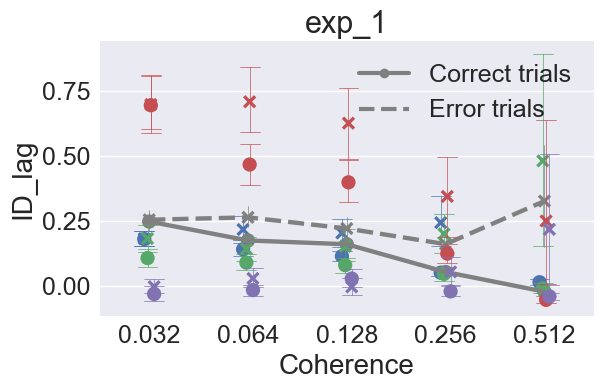

In [84]:
plot_var_vs_coherence(choices_1, exp_1, var='ID_lag')

It seems there is lots of individual variability in the lag, which we didn't notice previously. Let's look closer at individual-level lags in Exp 1

""


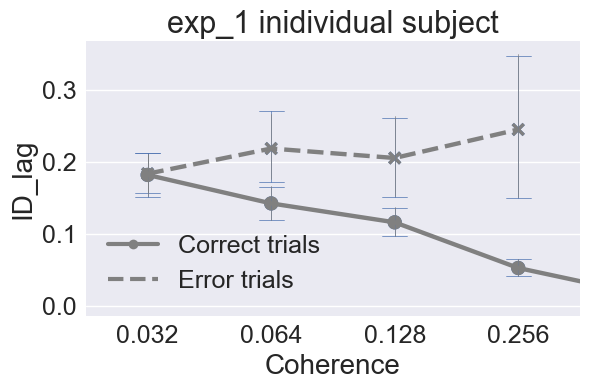

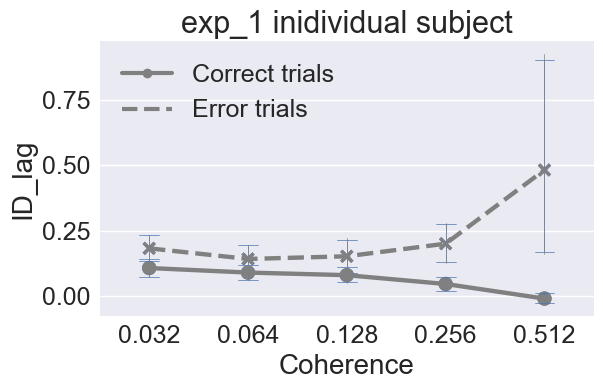

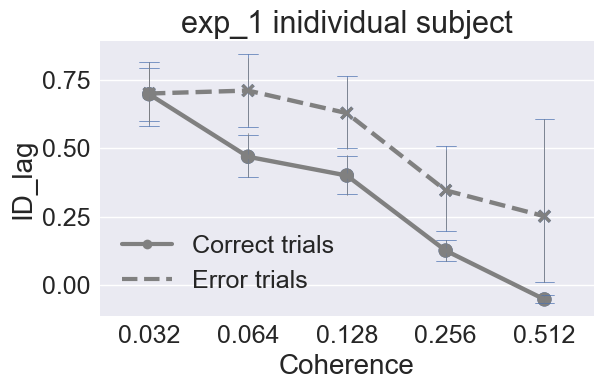

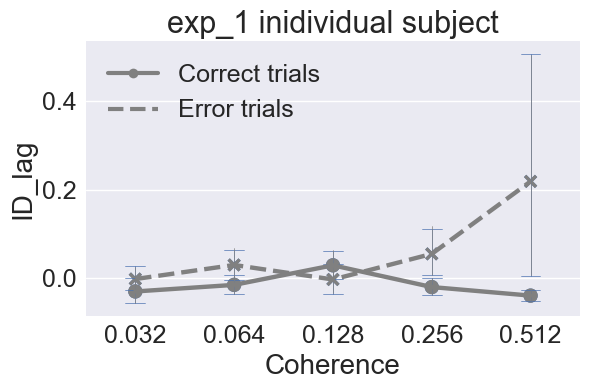

In [87]:
plot_1 = lambda c: plot_var_vs_coherence(c, 'exp_1 inidividual subject', var='ID_lag')
choices_1.groupby('subj_id').apply(plot_1)

Next, let's look at Exp 2 ID lag.

155 trials discarded due to no movements


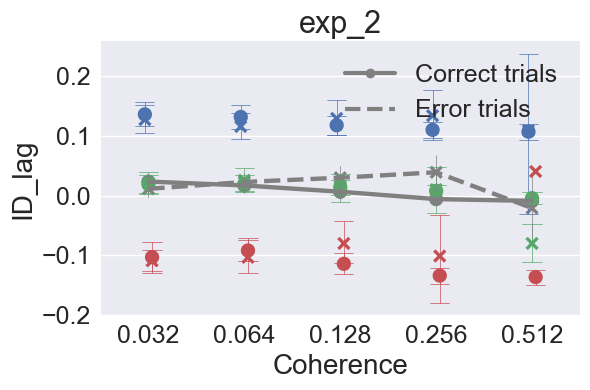

In [61]:
plot_var_vs_coherence(choices_2, exp_2, var='ID_lag')

Here the variability is even higher. The three participants have very different lags, one has positive lag, one has negative lag, and another one's lag is around 0. Let's zoom in,

""


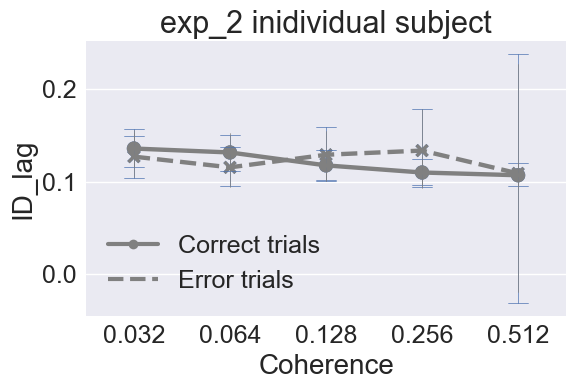

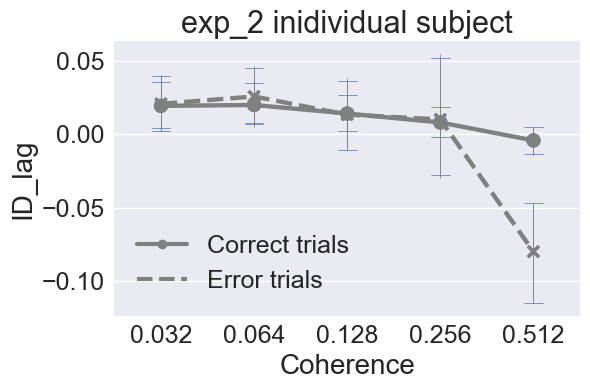

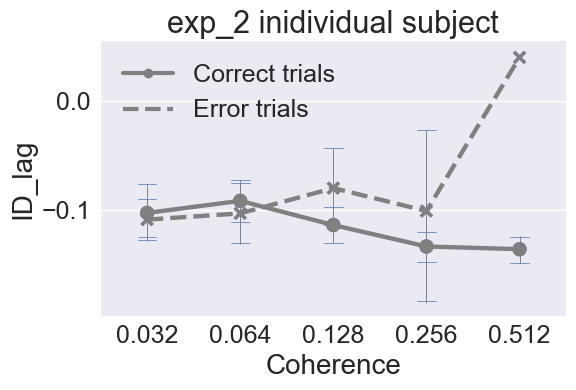

In [89]:
plot_2 = lambda c: plot_var_vs_coherence(c, 'exp_2 inidividual subject', var='ID_lag')

choices_2.groupby('subj_id').apply(plot_2)

So there still seems to be a decrease in hand-eye lag with coherence (at least in correct trials), regarding the value at individual baseline.  